Построить 2 предиктивных регрессии для 2 признаков (credit_score, Annual Income),оформить функции, проверить статистическую гипотезу

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [2]:
#Сначала импортируем необходимые модули и функции, которые мы будем использовать для решения проблемы #классификации данных:
# Импортирование необходимых модулей и атрибутов
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.metrics import f1_score as f1
from sklearn.metrics import classification_report
from matplotlib import pyplot

In [3]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

In [4]:
def show_distplot(feature, data, title, figsize):
    """Диаграмма распределения признака со средней, медианой и модой"""
    
    target_mean = round(data[feature].mean(), 2)
    target_median = data[feature].median()
    target_mode = data[feature].mode()[0]

    plt.figure(figsize = figsize)

    sns.distplot(data[feature], bins=70)

    plt.axvline(x=[target_mean], label='target_mean', linestyle=':',linewidth=4, color='red')
    plt.axvline(x=[target_median], label='target_median', linestyle='--', linewidth=4, color='green')
    plt.axvline(x=[target_mode], label='target_mode', linestyle='-.', linewidth=4, color='orange')
    plt.title(title)
    plt.legend()

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [5]:
df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [6]:
df.loc[(df['Credit Score'] > 1000)]


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
69,Home Mortgage,1408527.0,2 years,0.0,12.0,17.5,700062.0,0.0,21.0,0.0,other,Long Term,525998.0,174135.0,9320.0,6470.0,1
87,Home Mortgage,1533566.0,7 years,0.0,11.0,14.8,715462.0,0.0,19.0,0.0,debt consolidation,Short Term,210826.0,285475.0,18147.0,7440.0,1
94,Rent,1049294.0,3 years,0.0,5.0,6.1,249810.0,0.0,NaN,0.0,business loan,Short Term,337502.0,119529.0,15215.0,7010.0,1
96,Rent,757568.0,5 years,0.0,13.0,11.4,383548.0,0.0,NaN,0.0,debt consolidation,Short Term,210518.0,276583.0,11553.0,7320.0,1
116,Home Mortgage,1039984.0,NaN,0.0,10.0,23.8,147950.0,0.0,63.0,0.0,debt consolidation,Short Term,224246.0,95456.0,13780.0,7390.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,Rent,694868.0,1 year,0.0,4.0,7.8,143066.0,0.0,NaN,0.0,debt consolidation,Long Term,244178.0,122075.0,4268.0,6690.0,1
7433,Rent,2011758.0,< 1 year,0.0,4.0,14.9,22176.0,0.0,43.0,0.0,buy a car,Long Term,106480.0,18791.0,12590.0,6060.0,1
7450,Home Mortgage,1432277.0,10+ years,0.0,16.0,22.8,825176.0,0.0,NaN,0.0,debt consolidation,Short Term,187924.0,458242.0,27094.0,7290.0,1
7460,Rent,769462.0,5 years,0.0,8.0,17.0,313786.0,0.0,80.0,0.0,debt consolidation,Short Term,109186.0,45524.0,4585.0,7470.0,1


In [7]:
class Data:
    def __init__(self):
        self.medians=None
        self.mode=None
        self.model_regr_CrSc = None
        self.model_regr_AnIn = None
        self.int_feature = None
    
    def fit(self, x):

        self.medians = x[['Current Loan Amount', 'Annual Income', 'Credit Score' ]].median()
        self.mode = x['Bankruptcies'].mode()
    
    def transform(self, df):
        df['Years in current job'] = df['Years in current job'].fillna('0 years')
        df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
        df['Bankruptcies'] = df.Bankruptcies.fillna(self.mode[0])
        df.loc[df['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = self.medians['Current Loan Amount']
        
                # заполнение Annual Income регрессией
        df['Annual_Income_isnan'] = 0
        df.loc[df['Annual Income'].isna(), 'Annual_Income_isnan'] = 1
        df['Annual Income'].fillna(self.medians['Annual Income'], inplace=True)
        
        # заполнение Credit Score регрессией 
        df['Credit_Score_isnan'] = 0
        df.loc[df['Credit Score'].isna(), 'Credit_Score_isnan'] = 1
        df['Credit Score'].fillna(self.medians['Credit Score'], inplace=True)
        
        return df
    def fit_regr_Credit_Score(self, df):
       #Создание регрессии по Credit Score, обучение модели
        
        df_regr = df.copy()
        df_regr = df_regr[df_regr['Credit_Score_isnan'] == 0]
        df_regr = df_regr.drop(['Credit Default', 'Credit_Score_isnan'], axis=1)
        target_name_regr = 'Credit Score'
        feature_names_regr = df_regr.columns.drop(target_name_regr).tolist()
        feature_names_cat_regr = df_regr.select_dtypes(include=['int64', 'object']).columns.tolist()
        
        Xc = df_regr[feature_names_regr]
        yc = df_regr[target_name_regr]

        Xc_train, Xc_test, yc_train, yc_test = train_test_split(
            Xc,
            yc,
            shuffle=True,
            test_size=0.3,
            random_state=42
        )
        
        train_pool = Pool(Xc_train, yc_train, cat_features=feature_names_cat_regr)
        test_pool = Pool(Xc_test, yc_test, cat_features=feature_names_cat_regr)
        
        self.model_regr_CrSc = CatBoostRegressor(
            eval_metric='R2',
            silent=True,
            one_hot_max_size=20,
            early_stopping_rounds=40,
            boosting_type='Ordered',
            allow_writing_files=False,
            depth=4,
            iterations=400,
            learning_rate=0.05,
            l2_leaf_reg=2
        )

        self.model_regr_CrSc.fit(
            Pool(Xc_train, yc_train, cat_features=feature_names_cat_regr),
            eval_set=Pool(Xc_test, yc_test, cat_features=feature_names_cat_regr)
        )

        print(f'Credit Score R2: {self.model_regr_CrSc.get_best_score()}')
        del df_regr
        
    def fit_regr_Annual_Income(self, df):
        #Создание регрессии по Annual Income, обучение модели
        
        df_regr = df.copy()
        df_regr = df_regr[df_regr['Annual_Income_isnan'] == 0]
        df_regr = df_regr.drop(['Credit Default', 'Annual_Income_isnan'], axis=1)
        target_name_regr = 'Annual Income'
        feature_names_regr = df_regr.columns.drop(target_name_regr).tolist()
        feature_names_cat_regr = df_regr.select_dtypes(include=['int64', 'object']).columns.tolist()
        
        Xc = df_regr[feature_names_regr]
        yc = df_regr[target_name_regr]

        Xc_train, Xc_test, yc_train, yc_test = train_test_split(
            Xc,
            yc,
            shuffle=True,
            test_size=0.3,
            random_state=42
        )
        
        train_pool = Pool(Xc_train, yc_train, cat_features=feature_names_cat_regr)
        test_pool = Pool(Xc_test, yc_test, cat_features=feature_names_cat_regr)
        
        self.model_regr_AnIn = CatBoostRegressor(
            eval_metric='R2',
            silent=True,
            one_hot_max_size=20,
            early_stopping_rounds=40,
            boosting_type='Ordered',
            allow_writing_files=False,
            depth=6,
            iterations=500,
            learning_rate=0.4,
            l2_leaf_reg=3.5
        )

        self.model_regr_AnIn.fit(
            Pool(Xc_train, yc_train, cat_features=feature_names_cat_regr),
            eval_set=Pool(Xc_test, yc_test, cat_features=feature_names_cat_regr)
        )
        
        print(f'Annual Income R2: {self.model_regr_AnIn.get_best_score()}')
        del df_regr
    
    def apply_regr_Credit_Score(self, df):
        #Заполнение пропусков Credit Score
        
        cond = (df['Credit_Score_isnan'] == 1)
        Xc = df[cond].drop(['Credit Score', 'Credit Default', 'Credit_Score_isnan'], axis=1, errors='ignore')
        df.loc[cond, 'Credit Score'] = self.model_regr_CrSc.predict(Xc)
        df = df.drop(['Credit_Score_isnan'], axis=1)
        return df

    def apply_regr_Annual_Income(self, df):
        #Заполнение пропусков Annual Income
        
        cond = (df['Annual_Income_isnan'] == 1)
        Xc = df[cond].drop(['Annual Income', 'Credit Default', 'Annual_Income_isnan'], axis=1, errors='ignore')
        df.loc[cond, 'Annual Income'] = self.model_regr_AnIn.predict(Xc)
        df = df.drop(['Annual_Income_isnan'], axis=1)
        return df
    
    def features(self, df):
        
        # признак подозрительных наблюдений
        df = self.feature_isErrors(df)
        # дополнительно нагенереные фичи
        df = self.uncovered_debt(df)
        df = self.money_for_living(df)
        df = self.division(df)
        df = self.division_2(df)
        
        df = self.money_for_living_to_year(df)
        
        
        columns_to_int = ['Tax Liens', 'Bankruptcies', 'Number of Credit Problems']
        df[columns_to_int] = df[columns_to_int].astype(int)
        
        return df

    @staticmethod
    def feature_isErrors(df):
        df['isErrors'] = 0
        df.loc[df['Years of Credit History'] > 55, 'isErrors'] = 1
        df.loc[df['Credit Score'] > 1000, 'isErrors'] = 1
        
        return df
    @staticmethod
    def uncovered_debt(df):
        df['uncovered debt'] = 0
        df['uncovered debt'] = abs(df['Current Loan Amount'] - df['Current Credit Balance'])
        return df
    @staticmethod
    def money_for_living(df):
        df['money for living'] = 0
        df['money for living'] = ((df['Annual Income'] / 12) - df['Monthly Debt'])
        return df
    @staticmethod
    def division(df):
        df['division_loan_to_number'] = 0
        df['division_loan_to_number'] = df['Current Loan Amount'] / df['Number of Open Accounts']
        return df
    @staticmethod
    def division_2(df):
        df['division_loan_to_score'] = 0
        df['division_loan_to_score'] = df['Current Loan Amount'] / df['Credit Score']
        return df
    @staticmethod
    def money_for_living_to_year (df):
        df['cout_cash'] = 0
        df['cout_cash'] = df['Current Credit Balance'] + (df['money for living'] * 10)
        return df


In [8]:
# TRAIN_DATASET_PATH = 'course_project_train.csv'
# TEST_DATASET_PATH = 'course_project_test.csv'

In [9]:
df_train_base = pd.read_csv(TRAIN_DATASET_PATH)
df_test_base = pd.read_csv(TEST_DATASET_PATH)

In [10]:
df_test_base

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [11]:


data_inst = Data()

# тренировочный датасет
data_inst.fit(df_train_base)
df_train = data_inst.transform(df_train_base)
df_train = data_inst.features(df_train)

# регрессия Credit Score
data_inst.fit_regr_Credit_Score(df_train_base)
df_train = data_inst.apply_regr_Credit_Score(df_train_base)

# регрессия Annual Income
data_inst.fit_regr_Annual_Income(df_train_base)
df_train = data_inst.apply_regr_Annual_Income(df_train_base)

# тестовый датасет
df_test = data_inst.transform(df_test_base)
df_test = data_inst.features(df_test_base)
df_test = data_inst.apply_regr_Credit_Score(df_test_base)
df_test = data_inst.apply_regr_Annual_Income(df_test_base)

target_name = 'Credit Default'
feature_names = df_train.columns.drop(target_name).tolist()
feature_names_num = df_train.select_dtypes(include='float64').columns.tolist()
feature_names_cat = df_train.select_dtypes(include=['int64', 'object']).columns.drop(target_name).tolist()

Credit Score R2: {'learn': {'R2': 0.9987252550975053, 'RMSE': 58.621786468753534}, 'validation': {'R2': 0.9982965541459966, 'RMSE': 62.39750130262681}}
Annual Income R2: {'learn': {'R2': 0.9977151307147613, 'RMSE': 39683.05915729849}, 'validation': {'R2': 0.9880613270392741, 'RMSE': 96090.58354751722}}


In [12]:
from scipy.stats import shapiro, probplot, mannwhitneyu

In [13]:
df_train.columns.drop(target_name).tolist()

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit_Score_isnan',
 'isErrors',
 'uncovered debt',
 'money for living',
 'division_loan_to_number',
 'division_loan_to_score',
 'cout_cash']

Text(0.5, 1.0, 'Correlation with target variable')

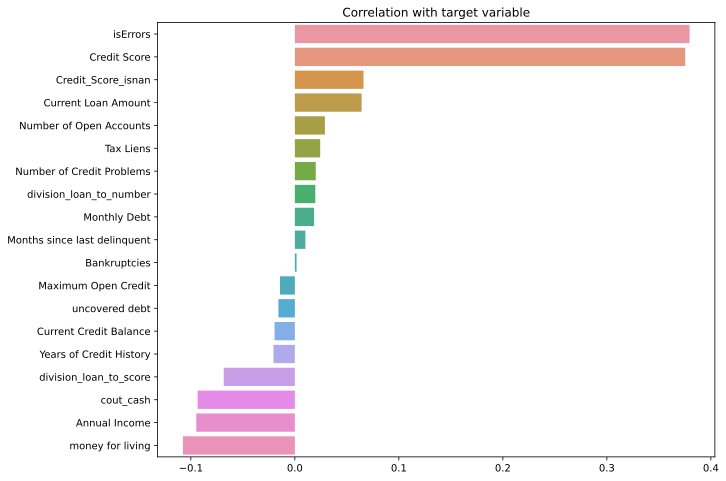

In [14]:
corr_with_target = df_train[feature_names + [target_name]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')

Text(0.5, 1.0, 'Credit Score grouped by target variable')

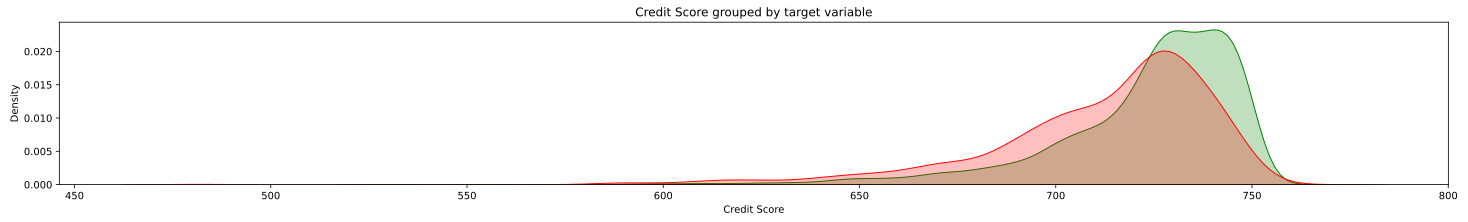

In [15]:
credit_score_with_target = df_train[df_train['Credit Score'] < 1000][['Credit Score', target_name]]
credit_score = credit_score_with_target['Credit Score']
credit_score_target_0 = credit_score[credit_score_with_target[target_name] == 0]
credit_score_target_1 = credit_score[credit_score_with_target[target_name] == 1]

plt.figure(figsize=(25, 3))

sns.kdeplot(credit_score_target_0, shade=True, label='class 0', color='g')
sns.kdeplot(credit_score_target_1, shade=True, label='class 1', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by target variable')

In [16]:
shapiro(credit_score)

ShapiroResult(statistic=0.8507503271102905, pvalue=0.0)

В соостветсвии с критерием Шапиро-Уилка распределение отлично от нормального

((array([-3.72509304, -3.49508022, -3.36856895, ...,  3.36856895,
          3.49508022,  3.72509304]),
  array([481.75884425, 530.17298513, 554.52453752, ..., 758.64850936,
         759.33638488, 771.18318308])),
 (23.565570420627214, 720.6618270428471, 0.922187375907932))

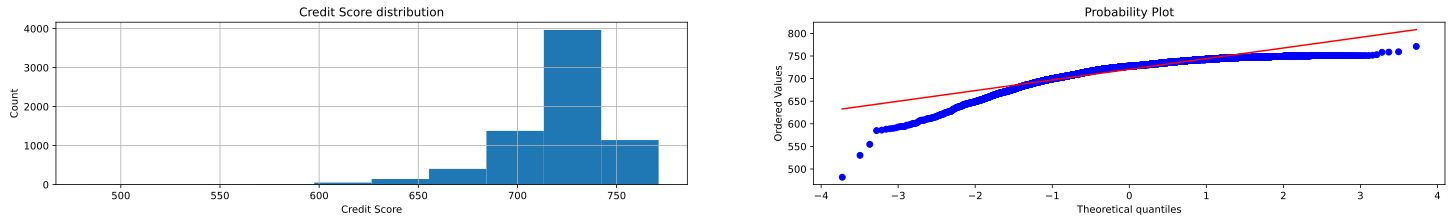

In [17]:
plt.figure(figsize=(25, 3))

ax1 = plt.subplot(121)
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Count')
ax1.set_title('Credit Score distribution')
credit_score.hist()

plt.subplot(122)
probplot(credit_score, dist='norm', plot=plt)

In [18]:
mannwhitneyu(credit_score_target_0, credit_score_target_1)

MannwhitneyuResult(statistic=3303974.0, pvalue=1.2535254115486301e-70)

Вероятность равенства мат. ожидания отвергается

Text(0.5, 1.0, 'Confidence intervals (95 %) for Credit Score')

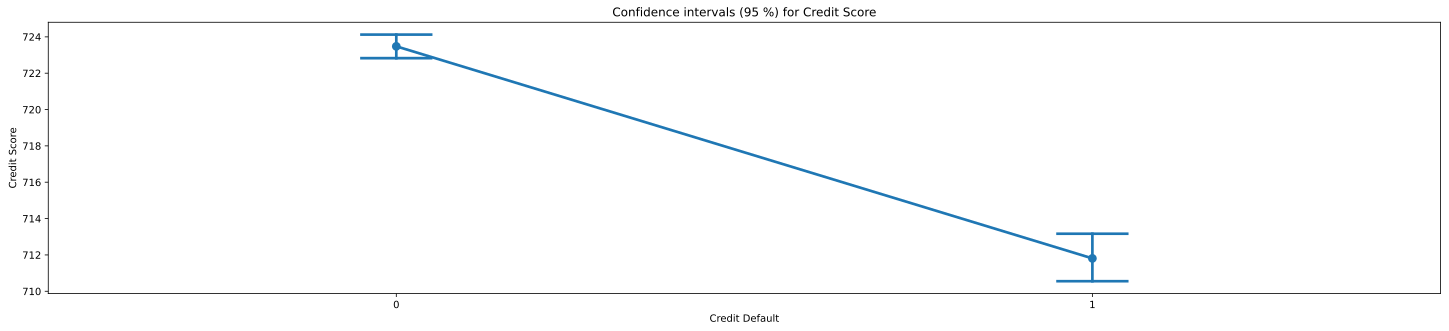

In [19]:
plt.figure(figsize=(25, 5))

sns.pointplot(x=target_name, y='Credit Score', data=credit_score_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')

In [20]:
col_obj = df_train.select_dtypes(include='object').columns.to_list()
col_obj

['Home Ownership', 'Years in current job', 'Purpose', 'Term']

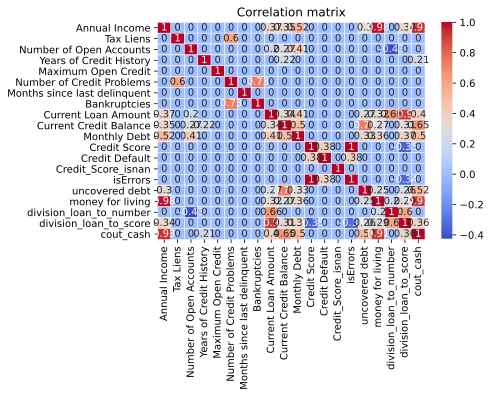

In [21]:

corr_matrix = df_train.corr()  # присваиваем значение корреляции переменной
corr_matrix = np.round(corr_matrix, 2) # округляем корреляцию до 2 символов после запятой
corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # зануляем корреляцию меньше 0,3
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')# annot=True - при значении False  не отображает цифры #в клеточках. cmap='coolwarm' - стиль цветов отображения корреляции

plt.title('Correlation matrix')
plt.show()

In [22]:
df_train_base.loc[df_train_base['Credit Default'] > 1000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Credit Score,Credit Default,Annual_Income_isnan,Credit_Score_isnan,isErrors,uncovered debt,money for living,division_loan_to_number,division_loan_to_score,cout_cash


In [23]:
X = df_train[feature_names]
y = df_train[target_name]

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.01,
    random_state=42,
    stratify=y
)

In [24]:
# y = df['Credit Default']
# X = df.drop('Credit Default', axis=1)

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7425 entries, 4120 to 1052
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7425 non-null   object 
 1   Annual Income                 7425 non-null   float64
 2   Years in current job          7425 non-null   object 
 3   Tax Liens                     7425 non-null   int32  
 4   Number of Open Accounts       7425 non-null   float64
 5   Years of Credit History       7425 non-null   float64
 6   Maximum Open Credit           7425 non-null   float64
 7   Number of Credit Problems     7425 non-null   int32  
 8   Months since last delinquent  7425 non-null   float64
 9   Bankruptcies                  7425 non-null   int32  
 10  Purpose                       7425 non-null   object 
 11  Term                          7425 non-null   object 
 12  Current Loan Amount           7425 non-null   float64
 13  

In [28]:
# outliers = LocalOutlierFactor(novelty=False, n_neighbors=10).fit_predict(X_train)
# outliers = (outliers+1)//2

# print('% of outliers on Local Oulier Factor:', 1 - (np.sum(outliers) / X_train.shape[0]))

In [29]:
# X_train = X_train.loc[np.array(X_train.index)[outliers == 1]]
# y_train = y_train.loc[np.array(y_train.index)[outliers == 1]]

In [30]:
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm
# from scipy import stats

In [31]:
# est = sm.OLS(y_train, sm.add_constant(X_train))
# est2 = est.fit()
# print(est2.summary())

In [32]:
# # Настройка параметров оценивания алгоритма
# num_folds = 10
# n_estimators = 100
# scoring = 'accuracy'

In [33]:
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('LSVC', LinearSVC()))
# models.append(('SVC', SVC()))
# models.append(('MLP', MLPClassifier()))
# models.append(('BG', BaggingClassifier(base_estimator = RandomForestClassifier(),n_estimators=n_estimators)))
# models.append(('RF', RandomForestClassifier(n_estimators=n_estimators)))
# models.append(('ET', ExtraTreesClassifier(n_estimators=n_estimators)))
# models.append(('AB', AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')))
# models.append(('GB', GradientBoostingClassifier(n_estimators=n_estimators)))
# models.append(('Cat', CatBoostClassifier()))



# # Оценивание эффективности выполнения каждого алгоритма
# scores = []
# names = []
# results = []
# predictions = []
# msg_row = []
# for name, model in models:
#     kfold = KFold(n_splits=num_folds, shuffle=True)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     names.append(name)
#     results.append(cv_results)
#     m_fit = model.fit(X_train, y_train)
#     m_predict = model.predict(X_test)
#     predictions.append(m_predict)
#     m_score = model.score(X_test, y_test)
#     scores.append(m_score)
#     msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(), cv_results.std(), m_score)
#     msg_row.append(msg)
#     print(msg)

In [34]:
# scores = []
# names = []
# results = []
# predictions = []
# msg_row = []

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaled = X_train.drop(col_obj, axis=1)
X_valid_scaled = X_valid.drop(col_obj, axis=1)
x_test_scaled = df_test.drop(col_obj, axis=1)

In [38]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_scaled), columns=X_train_scaled.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid_scaled), columns=X_valid_scaled.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_scaled), columns=x_test_scaled.columns)

In [39]:
# from sklearn.manifold import TSNE

In [40]:
# tsne = TSNE(n_components=3, learning_rate=250, random_state=42)

In [41]:
# X_train_tsne = tsne.fit_transform(X_train_scaled)

In [42]:
# plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
# plt.show()

In [43]:
from sklearn.cluster import KMeans

In [44]:
# model = KMeans(n_clusters=2, random_state=42, max_iter=200)
# model_kmeans = model.fit_predict(X_train_scaled)
# fig = plt.figure()
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection = '3d')

# x = X_train_tsne[:, 0]
# y = X_train_tsne[:, 1]
# z = X_train_tsne[:, 2]

# ax.scatter(x, y, z, c=model_kmeans)

# plt.show()

In [45]:
# model_kmeans_valid = model.predict(X_valid_scaled)
# model_kmeans_test_final = model.predict(x_test_scaled)
# X_train['klaster'] = model_kmeans
# X_valid['klaster'] = model_kmeans_valid
# df_test['klaster'] = model_kmeans_test_final

In [46]:
# X_train_scaled['klaster'] = model_kmeans
# X_valid_scaled['klaster'] = model_kmeans_valid
# x_test_scaled['klaster'] = model_kmeans_test_final

In [47]:
# lr = LogisticRegression()
# lr.fit(X_train_scaled, y_train)
# predict_x_train_scaler = lr.predict(X_train_scaled)
# predict_x_valid_scaler = lr.predict(X_valid_scaled)

In [48]:
# evaluate_preds(lr, y_train, y_valid, X_train_scaled, X_valid_scaled)

In [49]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_valid, lr.predict(X_valid_scaled))
# fpr, tpr, thresholds = roc_curve(y_valid, lr.predict_proba(X_valid_scaled)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [50]:
# predict_x_train_scaler

In [51]:
# X_train['klaster']

In [52]:
# X_valid.info()

In [53]:
# fig = pyplot.figure()
# fig.suptitle('Сравнение результатов выполнения алгоритмов')
# ax = fig.add_subplot(111)
# red_square = dict(markerfacecolor='r', marker='s')
# pyplot.boxplot(results, flierprops=red_square)
# ax.set_xticklabels(names, rotation=45)
# pyplot.show()

In [54]:
train_pool = Pool(
    X_train,
    y_train,
    cat_features=col_obj
)

test_pool = Pool(
    X_valid,
    y_valid,
    cat_features=col_obj
) 

params_model = {
    'eval_metric': 'F1',
    'auto_class_weights': 'Balanced',
    'silent': True,
    'one_hot_max_size': 30,
    'early_stopping_rounds': 50,
    'boosting_type': 'Ordered', #Ordered
    'allow_writing_files': False
}

In [ ]:

%%time
    cbr_model = CatBoostClassifier(**params_model)

    params_grid = {
        'depth': [4, 5, 6, 7,  8],
        'learning_rate': [0.03, 0.1, 0,16, 0.2, 0.3],
        'iterations': [100, 200, 400],
        'l2_leaf_reg': [0.5, 1, 2, 2.5, 3, 3.5, 4, 5, 6, 7 , 8, 9, 10],
        'bagging_temperature': [1, 1.5, 2]
    }

    gs = cbr_model.randomized_search(
        params_grid,
        train_pool,
        n_iter=100,
        shuffle=True,
        stratified=True,
        partition_random_seed=42,
        cv=5
    )

    pd.DataFrame(gs['cv_results']).sort_values('test-F1-mean', ascending=False).head()

Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6572712061
bestIteration = 55

0:	loss: 0.6572712	best: 0.6572712 (0)	total: 1.55s	remaining: 2m 33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6572712061
bestIteration = 55

1:	loss: 0.6572712	best: 0.6572712 (0)	total: 2.99s	remaining: 2m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6584216704
bestIteration = 322

2:	loss: 0.6584217	best: 0.6584217 (2)	total: 9.23s	remaining: 4m 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6505618124
bestIteration = 40

3:	loss: 0.6505618	best: 0.6584217 (2)	total: 11.3s	remaining: 4m 30s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6588868058
bestIteration = 45

4:	loss: 0.6588868	best: 0.6588868 (4)	total: 13.5s	remaining: 4m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6715433941
bestIteration = 33

5:	loss: 0.6715434	best: 0.6715434 (5)	total: 15.3s	rem

learning rate is greater than 1. You probably need to decrease learning rate.


In [ ]:
# gs['params']
# {'depth': 8,
#  'iterations': 400,
#  'bagging_temperature': 1.5,
#  'learning_rate': 0.1,
#  'l2_leaf_reg': 3.5}

In [ ]:
# {'bagging_temperature': 1,
#  'depth': 4,
#  'iterations': 200,
#  'learning_rate': 0.2,
#  'l2_leaf_reg': 2.5}      #ordered

In [ ]:
gs['params']

In [ ]:
%%time

cat_model = CatBoostClassifier(
    **params_model,
    depth=7,
    iterations=400,
    learning_rate=0.2,
    l2_leaf_reg=10,
    bagging_temperature=1,
    random_state=42
)

cat_model.fit(train_pool, eval_set=test_pool)

In [ ]:
def get_classification_report(y_train_true, y_train_pred, y_valid_true, y_valid_pred):
    """Отчет с метриками модели"""
    
    print('Train\n\n' + classification_report(y_train_true, y_train_pred))
    print('Test\n\n' + classification_report(y_valid_true, y_valid_pred))
    print('Confusion Matrix\n')
    print(pd.crosstab(y_valid_true, y_valid_pred))

In [ ]:
def evaluate_preds(model, y_train, y_valid, train_pool, test_pool):
    """Валидация модели, вывод отчетов"""
    
    y_train_pred = model.predict(train_pool)
    y_valid_pred = model.predict(test_pool)
    
    get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

In [ ]:
evaluate_preds(cat_model, y_train, y_valid, X_train, X_valid)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_valid, cat_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(y_valid, cat_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='CatBoostClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
feature_importances = pd.DataFrame(
    zip(X_train.columns, cat_model.get_feature_importance()),
    columns=['feature_name', 'importance']
)

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.head(40)

In [ ]:
y_pred_test = cat_model.predict(df_test)
y_pred_test

In [ ]:
submit = pd.DataFrame(y_pred_test, columns=['Credit Default'])


In [ ]:
submit.value_counts()

In [ ]:
sample_submit['Credit Default'] = submit

In [ ]:
sample_submit.to_csv('submission_8.csv', index=False)